In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum() # to check wheather is any duplicate value

np.int64(0)

In [ ]:
df['Exited'].value_counts() # imbalance data

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts() # imbalance data

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts() # balnced data

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [ ]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,False,False,True
3850,680,34,3,143292.95,1,1,0,66526.01,False,False,True
4962,531,42,2,0.00,2,0,1,90537.47,False,False,False
3886,710,34,8,147833.30,2,0,1,1561.58,True,False,True
5437,543,30,6,73481.05,1,1,1,176692.65,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,False,True,False
162,800,49,7,108007.36,1,0,0,47125.11,False,False,False
7903,567,34,10,0.00,2,0,1,161571.79,False,True,True
2242,621,30,2,101014.08,2,1,1,165257.31,True,False,False


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
# Now doing scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [ ]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
# Now applying ann model with keras

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential() # here we are making sequential model
model.add(Dense(18,activation='relu',input_dim=11))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             171 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397 (1.55 KB)

 Trainable params: 397 (1.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# doing gradient descent with optimizer named adams
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
ics=['accuracy']

In [ ]:
history= model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5779 - loss: 0.6733 - val_accuracy: 0.8044 - val_loss: 0.5081
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7995 - loss: 0.4801 - val_accuracy: 0.8119 - val_loss: 0.4387
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8187 - loss: 0.4313 - val_accuracy: 0.8156 - val_loss: 0.4169
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8285 - loss: 0.4094 - val_accuracy: 0.8288 - val_loss: 0.3973
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8419 - loss: 0.3925 - val_accuracy: 0.8413 - val_loss: 0.3794
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8462 - loss: 0.3733 - val_accuracy: 0.8481 - val_loss: 0.3668
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8501 - loss: 0.3653 - val_accuracy: 0.8487 - val_loss: 0.3606
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8518 - loss: 0.3593 - val_ac

In [ ]:
model.layers[0].get_weights() # it goes to layer 0 and gives the weight values

[array([[-1.54059455e-01,  5.76082945e-01, -7.91891515e-02,
         -3.06129664e-01, -1.51246786e-01,  1.16165683e-01,
         -3.46778840e-01, -2.78933644e-01, -2.13234574e-02,
          3.50793630e-01,  2.81243980e-01, -3.64543051e-01,
          2.77484119e-01, -1.32718399e-01,  3.29652011e-01,
         -1.29070744e-01,  1.99739501e-01,  2.09873900e-01],
        [ 1.90981477e-01, -5.25846720e-01, -8.24284315e-01,
         -4.48047556e-02, -6.64682627e-01, -1.00677729e+00,
         -3.49906504e-01,  3.57297659e-01, -2.28911966e-01,
         -2.09177062e-02, -4.88468766e-01,  4.17750478e-01,
         -8.60422850e-02,  8.08991313e-01, -7.47574449e-01,
          2.40539402e-01,  6.10126138e-01,  3.98637414e-01],
        [ 1.07294726e+00, -2.15088397e-01,  2.14928150e-01,
         -5.40539980e-01,  1.39262363e-01, -1.98479906e-01,
          1.34264141e-01, -8.01444054e-02,  1.59545675e-01,
         -4.70199063e-02, -1.58022597e-01, -1.81108966e-01,
         -2.03263402e-01,  9.77706090e

In [ ]:
model.layers[1].get_weights()

[array([[-1.2279995e-01,  7.3247790e-01,  3.5491562e-01,  3.7738094e-01,
         -1.1317137e+00, -4.9004176e-01, -1.8408468e-01,  5.1381493e-01,
         -5.0620645e-01],
        [ 1.9244144e-02,  5.2591527e-01,  1.9212124e-01,  1.9169509e-01,
         -9.9003142e-01, -3.0071804e-01,  2.0757282e-01,  2.8404075e-01,
         -6.3062817e-01],
        [-2.7788982e-01,  9.3037724e-01, -3.8075152e-01, -9.5171832e-02,
         -8.7475628e-01, -2.6743564e-01,  5.0434506e-01, -1.5401573e-01,
          2.4591386e-01],
        [-3.2527837e-01, -4.3081984e-02,  3.0005687e-01,  2.3957467e-01,
         -6.8172410e-02, -3.2684234e-01, -1.3376973e+00, -8.1539577e-01,
         -1.9782922e-01],
        [ 1.6886222e-01,  6.0755795e-01, -7.6330000e-01, -4.0341803e-01,
          3.2744160e-01,  4.4980609e-01,  8.7479815e-02,  1.0669984e-02,
          3.5365841e-01],
        [-1.1045209e+00,  2.0073520e-01, -4.9014249e-01, -5.7627833e-01,
         -2.1842533e-01,  2.5904596e-01,  3.3194420e-01, -1.9896121

In [ ]:
y_th = model.predict(x_test_scaled)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
yp = np.where(y_th>0.5,1,0)# here we took thershold as 0.5 but threshold is basically decided by Roc,Auc curve

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yp)

0.866

In [ ]:
history.history

{'accuracy': [0.7109375,
  0.8059375286102295,
  0.8203125,
  0.8303124904632568,
  0.842968761920929,
  0.8481249809265137,
  0.852343738079071,
  0.8539062738418579,
  0.8576562404632568,
  0.8579687476158142,
  0.859375,
  0.8604687452316284,
  0.860156238079071,
  0.8614062666893005,
  0.8620312213897705,
  0.86328125,
  0.862500011920929,
  0.8621875047683716,
  0.8642187714576721,
  0.8637499809265137,
  0.8646875023841858,
  0.8635937571525574,
  0.8626562356948853,
  0.8657812476158142,
  0.8628125190734863,
  0.8637499809265137,
  0.864062488079071,
  0.866406261920929,
  0.8639062643051147,
  0.8656250238418579,
  0.8643749952316284,
  0.8656250238418579,
  0.8659374713897705,
  0.8654687404632568,
  0.8670312762260437,
  0.8662499785423279,
  0.8671875,
  0.8684375286102295,
  0.8678125143051147,
  0.8681250214576721,
  0.8673437237739563,
  0.867968738079071,
  0.867968738079071,
  0.8689062595367432,
  0.867968738079071,
  0.8685937523841858,
  0.8685937523841858,
  0.8689

In [ ]:
import matplotlib.pyplot as plt


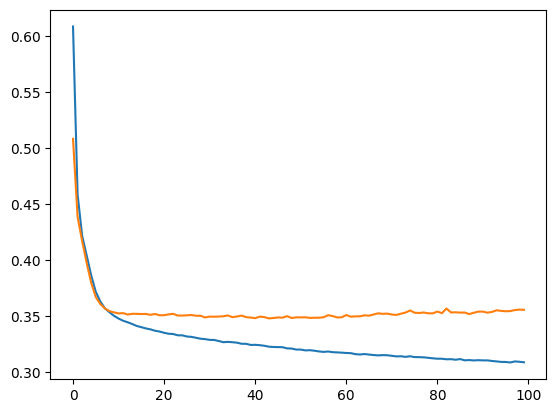

In [ ]:
plt.plot(history.history['loss'])# plotting training loss and validation loss to find wheather there is overfiting or not
plt.plot(history.history['val_loss'])#less difference between them means less overfitting

#  we can see there is not much difference.so,less overfitting

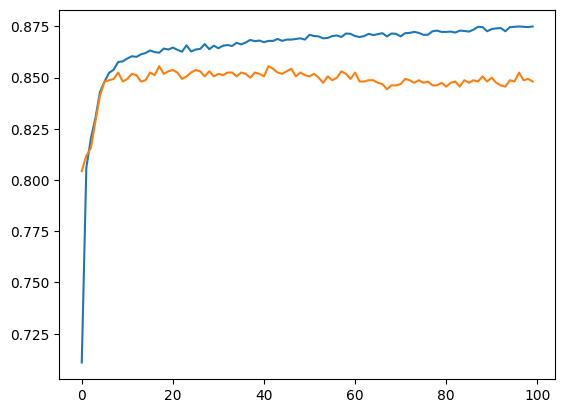

In [ ]:
plt.plot(history.history['accuracy'])# plotting training accuracy and validation accuracy to find wheather there is overfiting or not
plt.plot(history.history['val_accuracy'])#less difference between them means less overfitting